### **Regression using numpy (with pandas and pyplot)**

<font color="red">File access required:</font> In Colab this notebook requires first uploading files **Cities.csv** and **Players.csv** using the *Files* feature in the left toolbar. If running the notebook on a local computer, simply ensure these files are in the same workspace as the notebook.

In [3]:
# Set-up
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read Cities.csv into dataframe
f = open('Cities.csv')
cities = pd.read_csv(f)

In [5]:
cities.columns

Index(['city', 'country', 'latitude', 'longitude', 'temperature'], dtype='object')

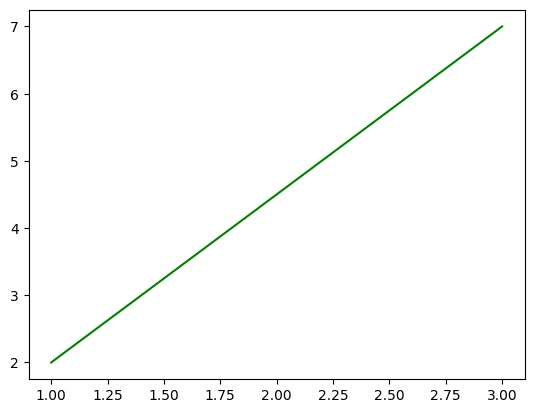

In [6]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

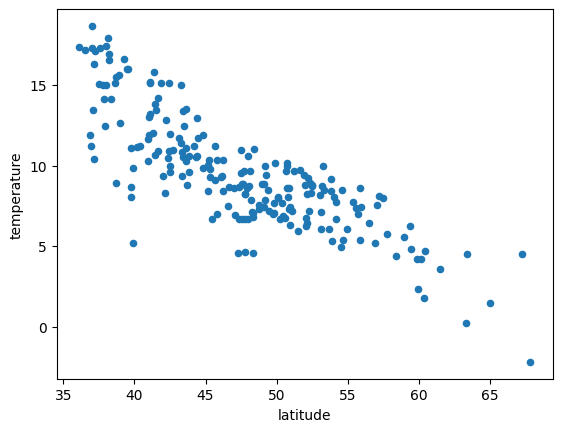

In [7]:
# Recall temperature versus latitude scatterplot
cities.plot.scatter('latitude', 'temperature')
plt.show()

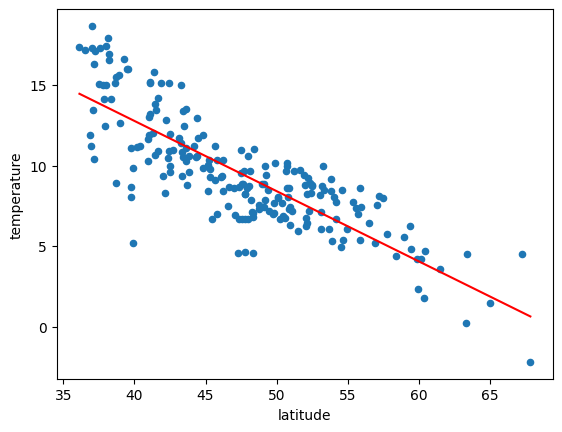

In [8]:
# Add linear regression
cities.plot.scatter('latitude', 'temperature')

a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = mx + b

x1 = min(cities.latitude)
x2 = max(cities.latitude)

plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [9]:
# Correlation coefficients (r values)
r = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus latitude:', r)

r = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus longitude:', r)

Correlation coefficient for temperature versus latitude: -0.8241046320267099
Correlation coefficient for temperature versus longitude: -0.16930750403617875


Training data:


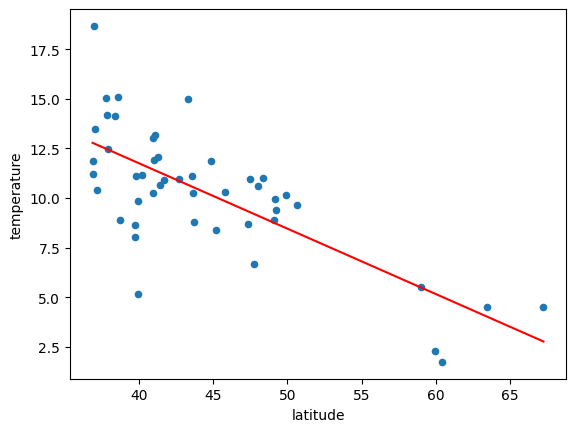

In [10]:
# Use linear regression for interactive temperature predictor
# Training data: compute and show latitude-temperature regression from cities
# in Norway, France, and Turkey
train = cities[ (cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')  ]
a,b = np.polyfit(train.latitude, train.temperature, 1) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b
print('Training data:')
train.plot.scatter('latitude', 'temperature')
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [11]:
train.head()

,city,country,latitude,longitude,temperature
3,Adana,Turkey,36.99,35.32,18.67
6,Amiens,France,49.90,2.30,10.17
10,Angers,France,47.48,-0.53,10.98
11,Ankara,Turkey,39.93,32.86,9.86
12,Antalya,Turkey,36.89,30.70,11.88


In [12]:
# Now loop asking for a city name; find the city's latitude, use the regression
# to predict the temperature, then check against the actual temperature.

while True:
    name = input('Enter city name (or "quit" to quit): ')

    if name == 'quit': break

    city = cities[cities.city == name]
    if len(city) == 0:
        print('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print('Predicted temperature:', a * float(city.latitude) + b) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b -> trained from 3 cities only
        print('Actual temperature:', float(city.temperature))

Enter city name (or "quit" to quit): quit


### <font color="green">**Your Turn: World Cup Data**</font>

In [13]:
# Read Players.csv into dataframe
f = open('Players.csv')
players = pd.read_csv(f)
list(players.columns)

['surname',
 'team',
 'position',
 'minutes',
 'shots',
 'passes',
 'tackles',
 'saves']

In [20]:
players.head()

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0,6,0,0
1,Belhadj,Algeria,defender,270,1,146,8,0
2,Boudebouz,Algeria,midfielder,74,3,28,1,0
3,Bougherra,Algeria,defender,270,1,89,11,0
4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2


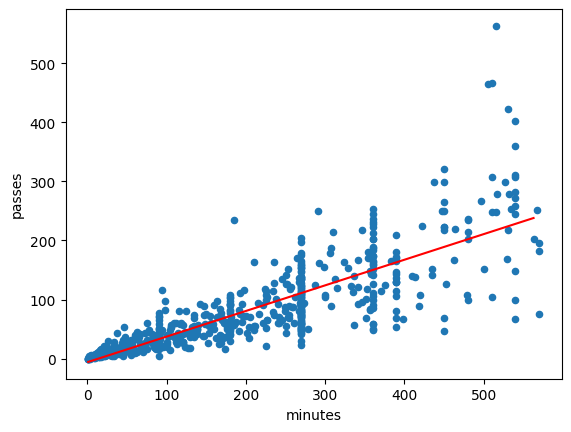

In [14]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).
players.plot.scatter('minutes', 'passes')
a,b = np.polyfit(players.minutes, players.passes, 1) # Regression line is y = mx + b

x1 = min(players.minutes)
x2 = max(players.passes)

plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [18]:
# Show the correlation coefficients for four regressions:
# passes versus minutes, tackles versus minutes, shots versus minutes,
# and saves versus minutes. Make sure to label each one.
r = np.corrcoef(players.passes, players.minutes)[1,0]
print('Correlation coefficient for passes versus minutes:', r)

r = np.corrcoef(players.tackles, players.minutes)[1,0]
print('Correlation coefficient for tackles versus minutes:', r)

r = np.corrcoef(players.shots, players.minutes)[1,0]
print('Correlation coefficient for shots versus minutes:', r)

r = np.corrcoef(players.saves, players.minutes)[1,0]
print('Correlation coefficient for saves versus minutes:', r)

Correlation coefficient for passes versus minutes: 0.8151193157954872
Correlation coefficient for tackles versus minutes: 0.6106734613835504
Correlation coefficient for shots versus minutes: 0.4079230774054165
Correlation coefficient for saves versus minutes: 0.22847723253087995


In [21]:
# BONUS!
# Repeat the previous problem, except consider each position separately.
# That is, show correlation coefficients separately for the forwards,
# midfielders, defenders, and goalkeepers. If you get a warning, you
# may hard-code the fact that only goalkeepers make saves.

positions = ['forward', 'midfielder', 'defender', 'goalkeeper']

for pos in positions:
    subset = players[players.position == pos]

    print(f'\nPosition: {pos}')

    r = np.corrcoef(subset.passes, subset.minutes)[1, 0]
    print('  passes vs minutes:', r)

    r = np.corrcoef(subset.tackles, subset.minutes)[1, 0]
    print('  tackles vs minutes:', r)

    r = np.corrcoef(subset.shots, subset.minutes)[1, 0]
    print('  shots vs minutes:', r)

    if pos == 'Goalkeeper':
        r = np.corrcoef(subset.saves, subset.minutes)[1, 0]
        print('  saves vs minutes:', r)



Position: forward
  passes vs minutes: 0.8878879513279622
  tackles vs minutes: 0.574708922654714
  shots vs minutes: 0.8481803964835184

Position: midfielder
  passes vs minutes: 0.865429580683516
  tackles vs minutes: 0.7793091396604376
  shots vs minutes: 0.5360369284446228

Position: defender
  passes vs minutes: 0.891885240439449
  tackles vs minutes: 0.6959873475487464
  shots vs minutes: 0.3623603154015943

Position: goalkeeper
  passes vs minutes: 0.8016811641352866
  tackles vs minutes: 0.24793450789982802
  shots vs minutes: -0.18926055771763878


Training data:


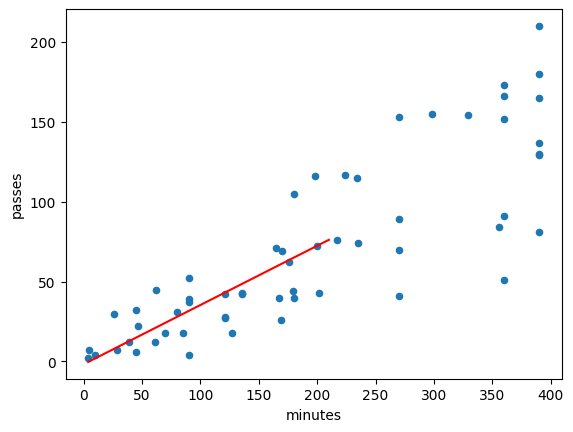

In [25]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute and show minutes-passes regression for players
# from Greece, USA, and Portugal

countries = ['Greece', 'USA', 'Portugal']

train = players[players.team.isin(countries)]
a,b = np.polyfit(train.minutes, train.passes, 1) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b

print('Training data:')
train.plot.scatter('minutes', 'passes')
x1 = min(train.minutes)
x2 = max(train.passes)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()



In [26]:
# Now loop asking for a player's surname; find the number of minutes the
# player played, use the regression to predict the number of passes made,
# then check against the actual number.
#
# Once your predictor seems to be working, try surname Barry, Gomez, or Pepe.
# You probably get an error; figure out the underlying reason for the error,
# then modify your code so it prints a suitable message for surnames like these,
# instead of raising an error.
while True:
    surname = input('\nEnter player surname (or q to quit): ')
    if surname.lower() == 'q':
        break

    player = players[players.surname == surname]

    if len(player) == 0:
        print('No player found with that surname.')
        continue

    if len(player) > 1:
        print('Multiple players share this surname. Please be more specific.')
        continue

    minutes = player.iloc[0].minutes
    actual_passes = player.iloc[0].passes

    predicted_passes = a * minutes + b

    print(f'Minutes played: {minutes}')
    print(f'Predicted passes: {predicted_passes:.1f}')
    print(f'Actual passes: {actual_passes}')



Enter player surname (or q to quit): Messi
Minutes played: 450
Predicted passes: 165.1
Actual passes: 321

Enter player surname (or q to quit): Salah
No player found with that surname.

Enter player surname (or q to quit): Ronaldo
Minutes played: 360
Predicted passes: 131.8
Actual passes: 91

Enter player surname (or q to quit): Abdoun
Minutes played: 16
Predicted passes: 4.2
Actual passes: 6

Enter player surname (or q to quit): q



Training data for position: forward
passes = 0.3437 * minutes + -6.47


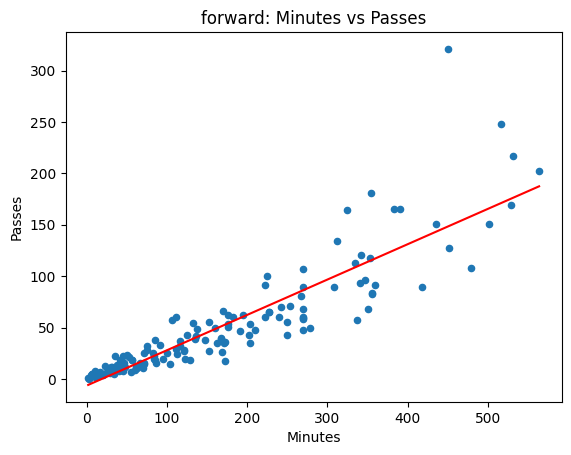


Training data for position: midfielder
passes = 0.5292 * minutes + -6.10


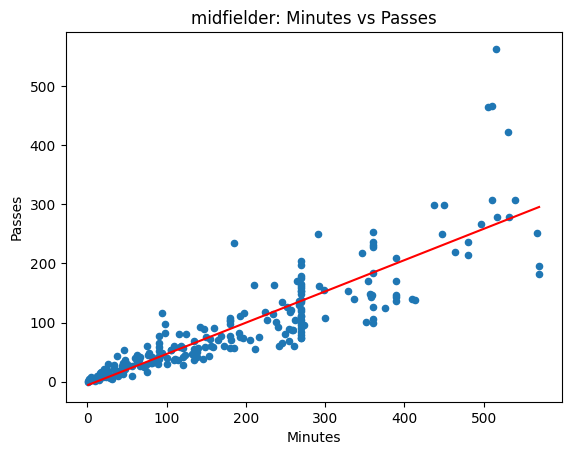


Training data for position: defender
passes = 0.4874 * minutes + -15.12


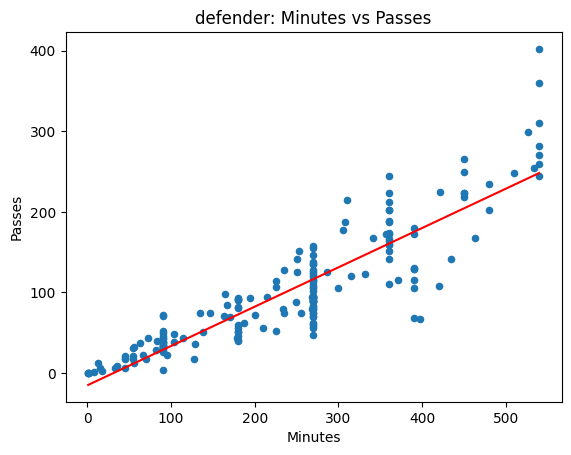


Training data for position: goalkeeper
passes = 0.1735 * minutes + 1.00


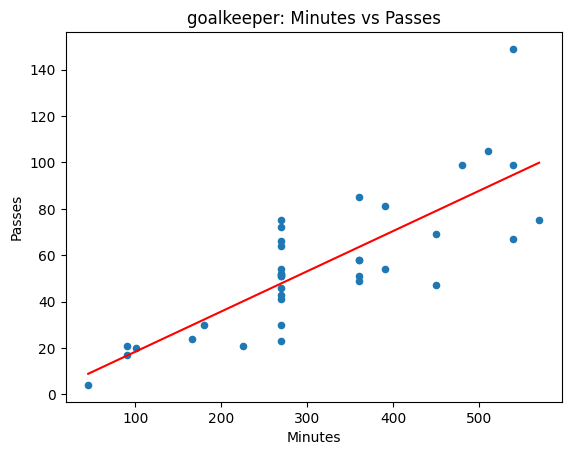

In [27]:
# BONUS!
# Repeat previous but use separate predictors for the four different positions
# (forward,midfielder,defender,goalkeeper). Does it do better?
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string
positions = ['forward', 'midfielder', 'defender', 'goalkeeper']

for pos in positions:
    subset = players[players.position == pos]

    # Skip positions with too little data
    if len(subset) < 2:
        continue

    a, b = np.polyfit(subset.minutes, subset.passes, 1)  # y = ax + b

    print(f'\nTraining data for position: {pos}')
    print(f'passes = {a:.4f} * minutes + {b:.2f}')

    subset.plot.scatter('minutes', 'passes')

    x1 = min(subset.minutes)
    x2 = max(subset.minutes)

    plt.plot([x1, x2], [a*x1 + b, a*x2 + b], color='red')
    plt.title(f'{pos}: Minutes vs Passes')
    plt.xlabel('Minutes')
    plt.ylabel('Passes')
    plt.show()



In [32]:
positions = ['forward', 'midfielder', 'defender', 'goalkeeper']
models = {}

for pos in positions:
    subset = players[players.position == pos]

    if len(subset) < 2:
        continue

    a, b = np.polyfit(subset.minutes, subset.passes, 1)
    models[pos] = (a, b)


In [33]:

while True:
    surname = input('\nEnter player surmname (or q to quit): ')
    if surname.lower() == 'q':
        break

    player = players[players.surname == surname]

    if len(player) == 0:
        print('No player found with that surname.')
        continue

    if len(player) > 1:
        print('Multiple players share this surname. Please be more specific.')
        continue

    pos = player.iloc[0].position
    minutes = player.iloc[0].minutes
    actual_passes = player.iloc[0].passes

    if pos not in models:
        print(f'No regression model available for position: {pos}')
        continue

    a, b = models[pos]
    predicted_passes = a * minutes + b

    print(f'Position: {pos}')
    print(f'Minutes played: {minutes}')
    print(f'Predicted passes: {predicted_passes:.1f}')
    print(f'Actual passes: {actual_passes}')



Enter player surname (or q to quit): 
No player found with that surname.

Enter player surname (or q to quit): Messi
Position: forward
Minutes played: 450
Predicted passes: 148.2
Actual passes: 321

Enter player surname (or q to quit): q
